# МКР для решения 2D линейного эллиптического уравнения скалярного переменного

## Задача c граничными условиями Дирихле

Необходимо найти поле температуры $T$ в прямоугольной пластине. Значение поля на каждой грани пластины известно. Пластина изотропна и коэффициент теплопроводности $\lambda=1.$.

![fd_2d_task](../images/fd_2d_task.svg)

Поле температур будет удовлетворять уравнению:

\begin{align}
\frac{\partial}{\partial x_1}\left(\lambda \frac{\partial T}{\partial x_1}\right) + \frac{\partial}{\partial x_2}\left(\lambda \frac{\partial T}{\partial x_2}\right)  = 0.
\end{align}

### Численное решение

1. Построим конечно-разностную сетку:



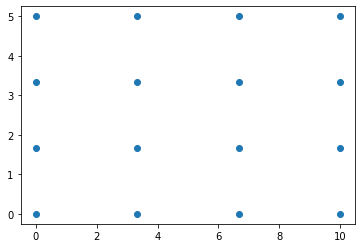

In [37]:
import numpy as np
import matplotlib.pyplot as plt
L_1, L_2 = 10., 5
n_1, n_2 = 4, 4 # количество узлов
h_1, h_2 = L_1/(n_1 - 1), L_2/(n_2 - 1) # шаг конечной разности

x_nodes = np.array([[i * h_1, j * h_2] for i in range(n_1) for j in range(n_2)])

plt.scatter(x_nodes[:, 0], x_nodes[:, 1])

2. Используя конечно разностные аппроксимации производных, запишем систему уравнений:

\begin{align}
\left.\frac{\partial}{\partial x_1} \left(\lambda \frac{\partial T}{\partial x_1}\right)\right|_{x_{i, j}} \approx \lambda \frac{T(x_{i+1, j}) - 2T(x_{i, j}) + T(x_{i-1, j})}{h_1^2} \\
\left.\frac{\partial}{\partial x_2} \left(\lambda \frac{\partial T}{\partial x_2}\right)\right|_{x_{i, j}} \approx \lambda \frac{T(x_{i, j+1}) - 2T(x_{i, j}) + T(x_{i, j-1})}{h_2^2}
\end{align}

\begin{align}
\lambda \frac{T(x_{i+1, j}) - 2T(x_{i, j}) + T(x_{i-1, j})}{h_1^2} + \lambda \frac{T(x_{i, j+1}) - 2T(x_{i, j}) + T(x_{i, j-1})}{h_2^2} = 0
\end{align}

Для поиска решения с помощью методов линейной алгебры необходимо свести систему к матричному виду:

\begin{align}
[A] \{T\} = 0,
\end{align}

где $[A]$ - матрица коэфициентов, $\{T\}$ - вектор температур в узлах сетки.

Для построения матрицы коэффициентов необходимо двумерную нумерацию узлов свести к одномерной. Для этого заменим индексы $i, j$ на индекс $k = i * n_1 + j$

In [45]:
def k(i, j):
    return i * n_1 + j

l = 1.

A = np.zeros((n_1 * n_2, n_1 * n_2))
for i in range(1, n_1 - 1):
    for j in range(1, n_2 - 1):
        A[k(i, j)][k(i + 1, j)] = l / h_1 ** 2
        A[k(i, j)][k(i, j)] = -2. / h_1 ** 2 - 2. / h_2
        A[k(i, j)][k(i - 1, j)] = l / h_1 ** 2
        A[k(i, j)][k(i, j + 1)] = l / h_1 ** 2
        A[k(i, j)][k(i, j - 1)] = l / h_1 ** 2

import pandas as pd
print(pd.DataFrame(A))

     0     1     2    3     4     5     6     7     8     9     10    11   12  \
0   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
1   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
2   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
3   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
4   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
5   0.0  0.09  0.00  0.0  0.09 -1.38  0.09  0.00  0.00  0.09  0.00  0.00  0.0   
6   0.0  0.00  0.09  0.0  0.00  0.09 -1.38  0.09  0.00  0.00  0.09  0.00  0.0   
7   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
8   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0   
9   0.0  0.00  0.00  0.0  0.00  0.09  0.00  0.00  0.09 -1.38  0.09  0.00  0.0   
10  0.0  0.00  0.00  0.0  0.00  0.00  0.09  0.00  0.00  0.09 -1.38  0.09  0.0   
11  0.0  0.00  0.00  0.0  0.

3. Добавим в систему граничные условия:

4. Решим СЛАУ:

In [ ]:
x = np.linalg.solve(A, b)